In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import pandas as pd
import seaborn as sns

In [10]:
import graphufs
from graphufs.lineplot import LinePlotter

In [11]:
plt.style.use("graphufs.plotstyle")

In [17]:
expt = "R0"
fig_dir = "figures"
fig_dir_loc = os.path.join(os.path.abspath(""), expt, fig_dir)
if not os.path.isdir(fig_dir_loc):
    os.makedirs(fig_dir)

In [13]:
truths = ["HRES Analysis", "ERA5",]
models = [
    "GraphUFS Coupled"
    #"GraphUFS p2p uvwcsic",
    #"GraphUFS p2p uvwcsicisp",
    #"GraphUFS p2p uvnc",
    #"GraphUFS p2p uvncbs32",
    #"GraphUFS p2p nvnc",
]

In [14]:
data_dir = "/pscratch/sd/n/nagarwal/cp1/R0/inference/validation/postprocessed_inference_35252102"
duration = "240h"
year = 2018

errors = {}

for truth in truths:
    tname = truth.lower().replace(" ", "_")
    errors[truth] = {}
    for model in models:
        name = model.lower().replace(" ", "_")
        if "GraphUFS" in model:
            middle = duration
            location = f"{data_dir}"
        elif "Replay" in model:
            middle = duration
            location = f"{data_dir}/graphufs/p2/validation"
        else:
            middle = year
            location = f"{data_dir}/baselines"
            
        readname = name if "graphufs" not in name else model.split(" ")[0].lower()
        fname = f"{location}/{readname}_vs_{tname}_{middle}_deterministic.nc"
        if not (truth.lower() == "replay" and readname in ("graphcast", "ifs_ens_mean", "replay")):
            kk = model if model != "GraphUFS p2p uvwc" else "GraphUFS p2c"
            errors[truth][kk] = graphufs.utils.open_dataset(fname)


In [15]:
lp = LinePlotter()

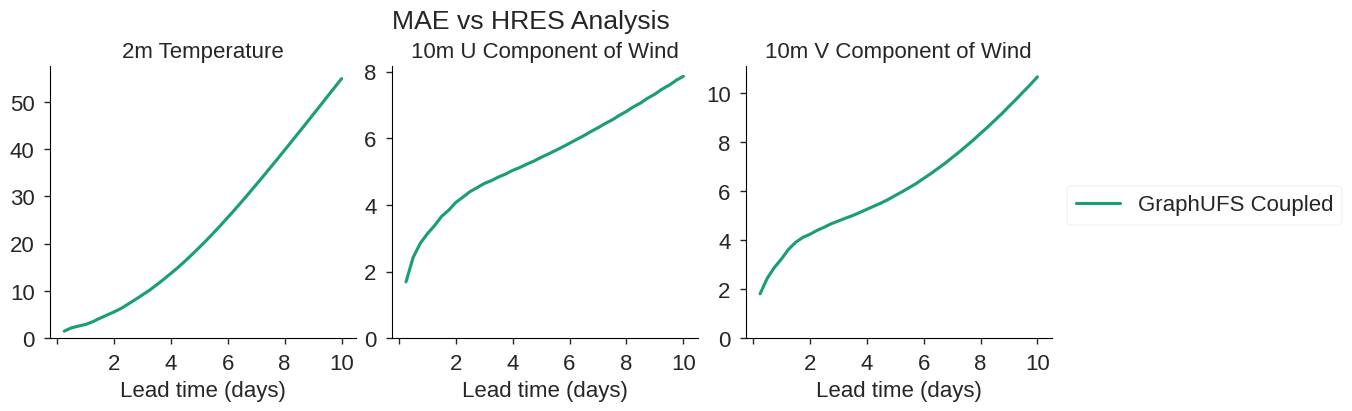

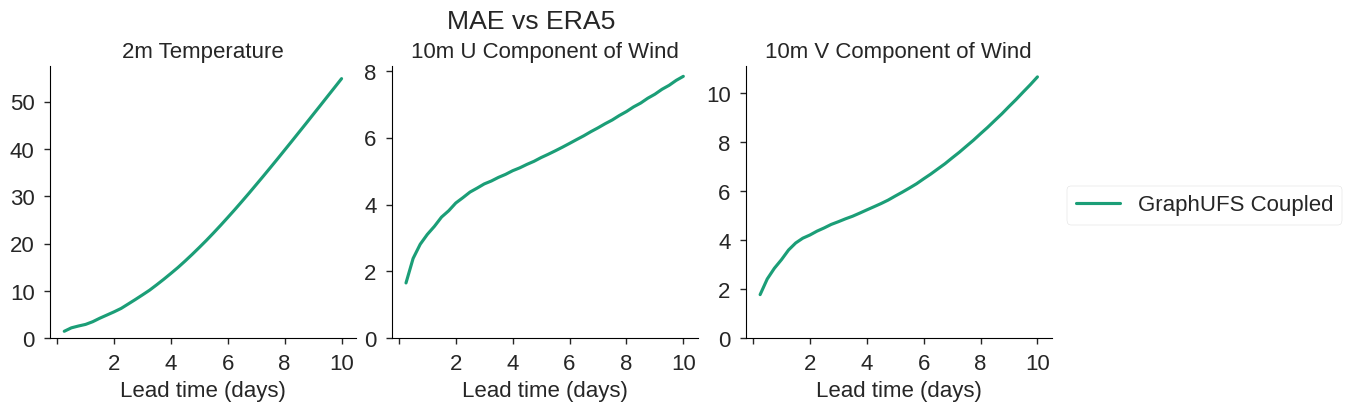

In [18]:
metric = "mae"
for truth in truths:
    kw = {}
    if truth == "Replay":
        kw["fields"] = ("surface_pressure", "2m_temperature", "2m_specific_humidity", "10m_u_component_of_wind", "10m_v_component_of_wind")
    else:
        kw["fields"] = ("2m_temperature", "10m_u_component_of_wind", "10m_v_component_of_wind")
    fig, axs = lp.plot_surface(
        errors[truth],
        truth=truth,
        metric=metric,
        **kw
    )
    [ax.set(xticks=np.arange(0, 11*24, 2*24)) for ax in axs]
    fname = f"{fig_dir_loc}/{metric.upper()}_vs_{truth.lower().replace(' ', '_')}_CP1_{expt}_surface.jpeg"
    fig.savefig(fname, bbox_inches="tight", dpi=300)

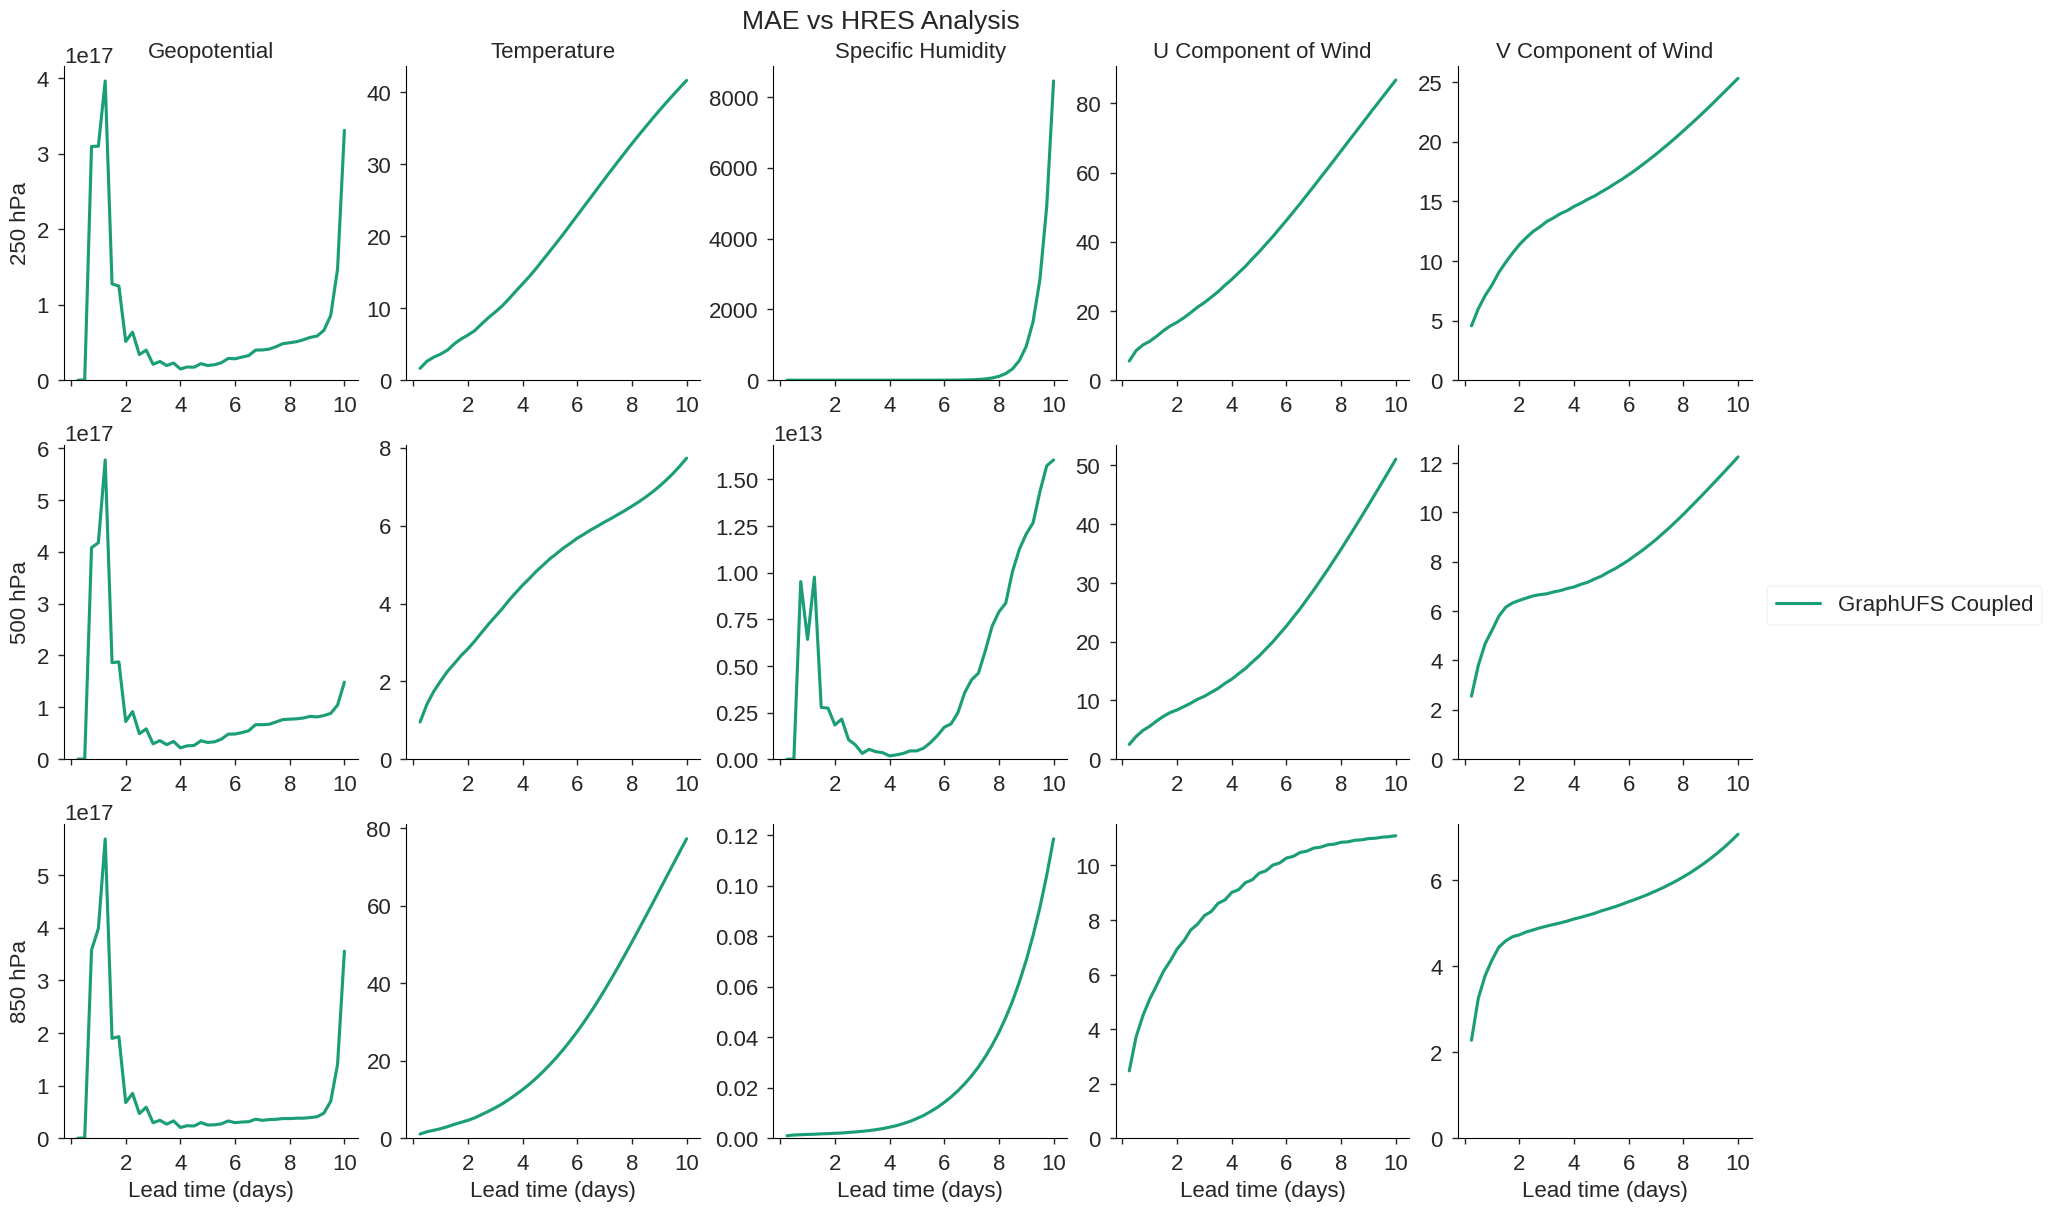

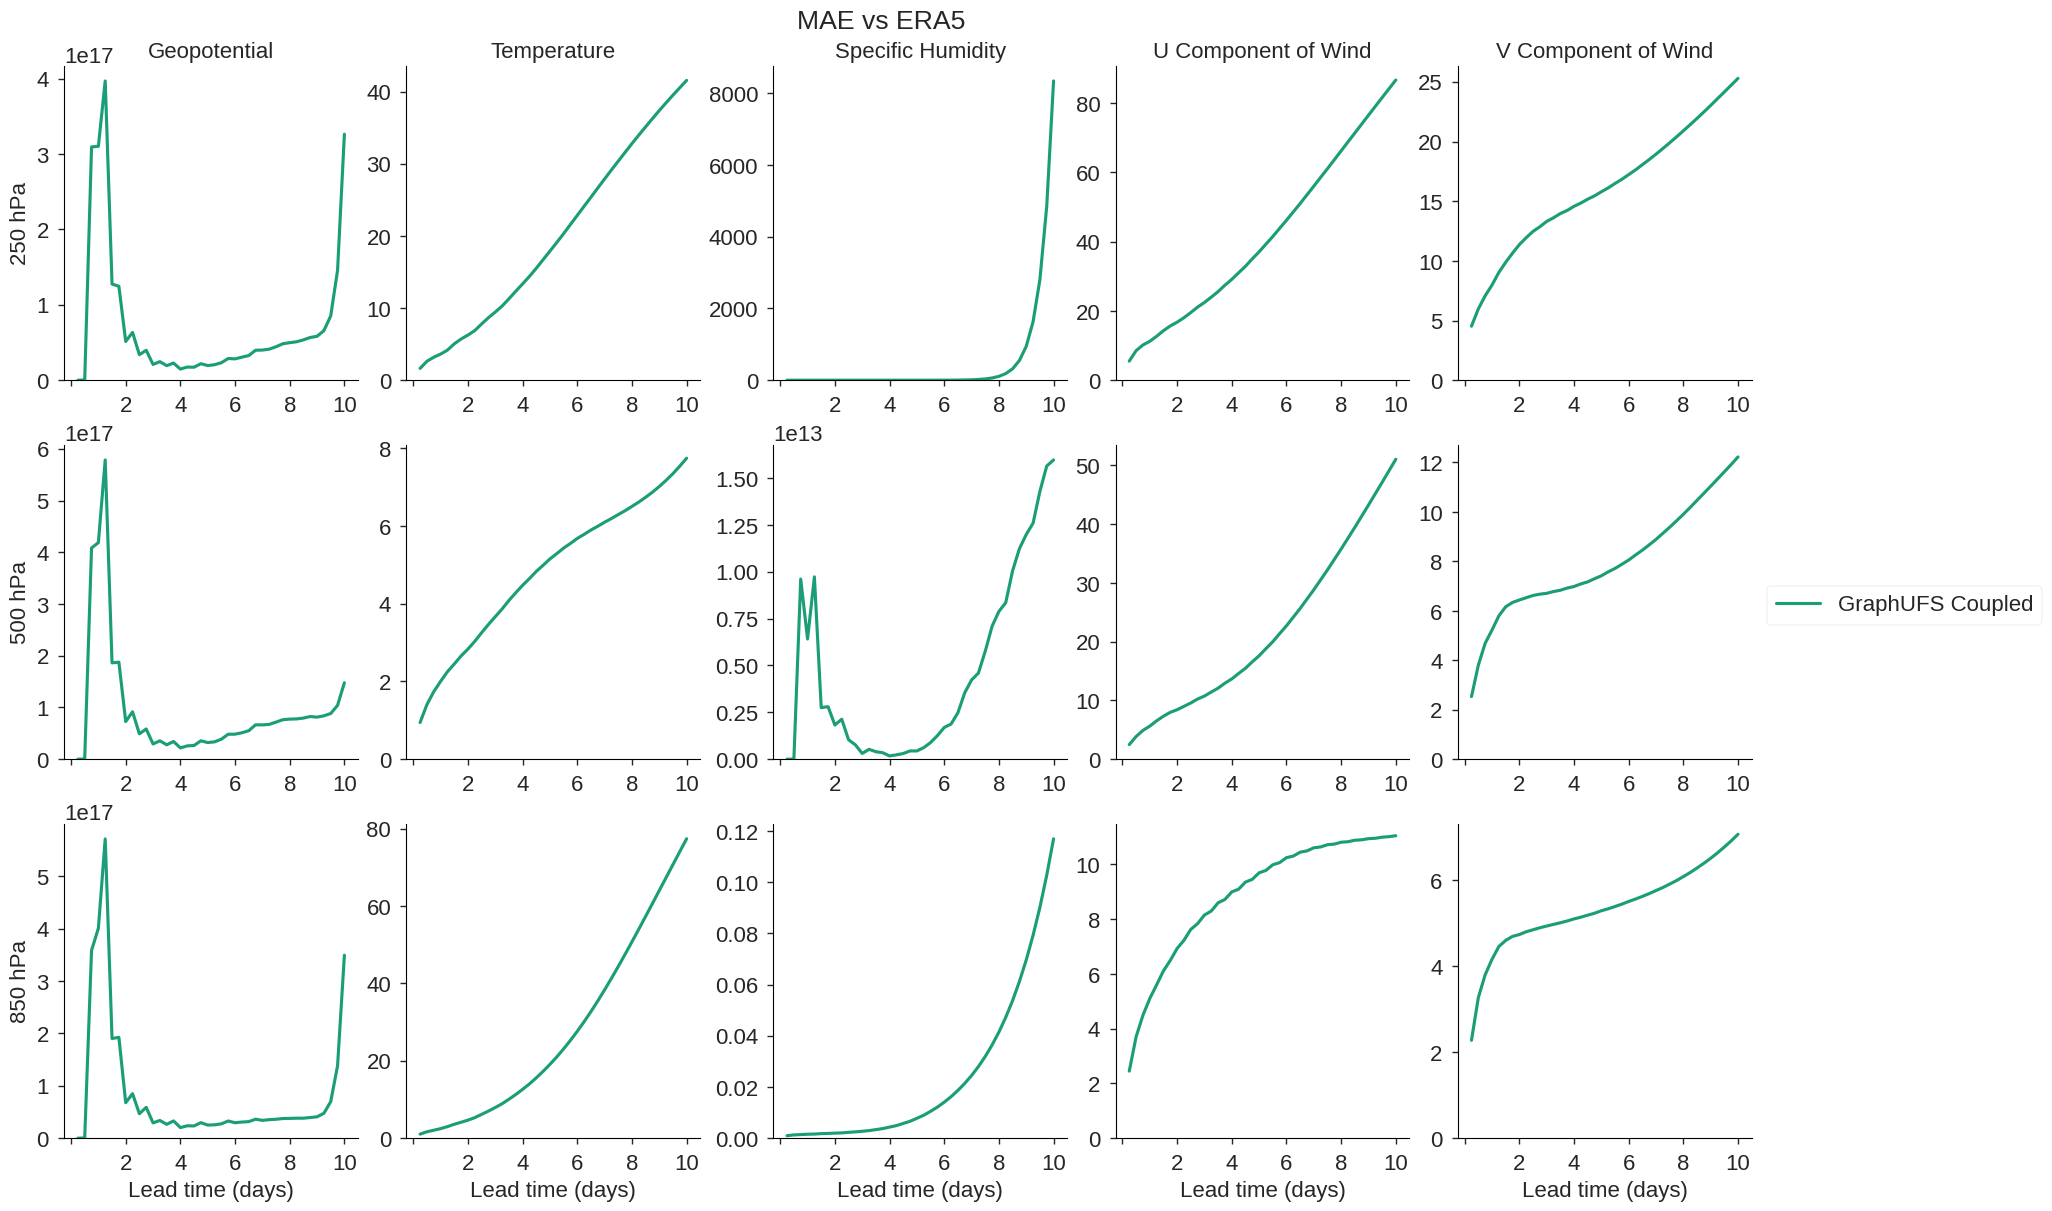

In [20]:
kw = dict(
    levels=(250, 500, 850),
    fields=("geopotential", "temperature", "specific_humidity", "u_component_of_wind", "v_component_of_wind"),
)

for truth in truths:
    fig, axs = lp.plot_levels(
        errors[truth],
        truth=truth,
        metric=metric,
        **kw,
    )
    [ax.set(xticks=np.arange(0, 11*24, 2*24)) for ax in axs.flatten()]
    fname = f"{fig_dir_loc}/{metric}_vs_{truth.lower().replace(' ', '_')}_CP1_{expt}_levels.jpeg"
    fig.savefig(fname, bbox_inches="tight", dpi=300)